In [1]:
from utils import *
from core import *
import imageio.v3 as iio
from PIL import Image

im = iio.imread('../assets/800px-SheppLogan.png')

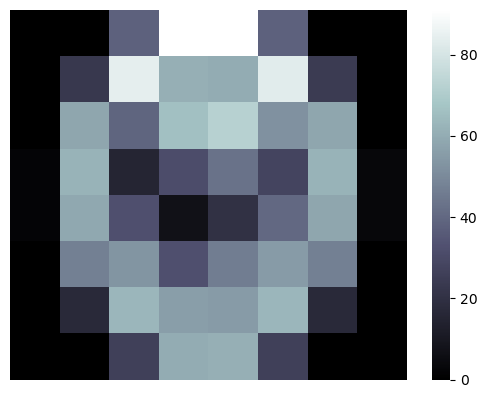

In [2]:
# loading image
new_res = 8

img = Image.fromarray(im).resize((new_res, new_res))
img = np.array(img.convert('L'))
plot_image(img, cmap='bone')

In [3]:
A = CreateInterceptMatrix(
  no_of_detectors=new_res,
  source_to_object=20,
  source_to_detector=40,
  size_of_object=5,
  no_of_rotations=new_res,
  angle_bw_detectors=0.1,
  resolution=new_res
).create_intercept_matrix_from_lines()

## Forward Problem

solving the forward problem of obtaining detector readings using image matrix (shepp Logan)

In [4]:
x = img
x.shape

(8, 8)

In [5]:
A.shape

(64, 64)

In [6]:
b = A @ x.flatten()
b.shape

(64,)

## Backward Problem

In [7]:
soln = general_soln(A, b)

In [8]:
soln.rank

20

In [9]:
x_try = soln.x_particular + soln.X_nullspace[:, 1].reshape(-1, 1)

In [10]:
x = SolveEquation(A, b).solve(useLibrary='lstsq')

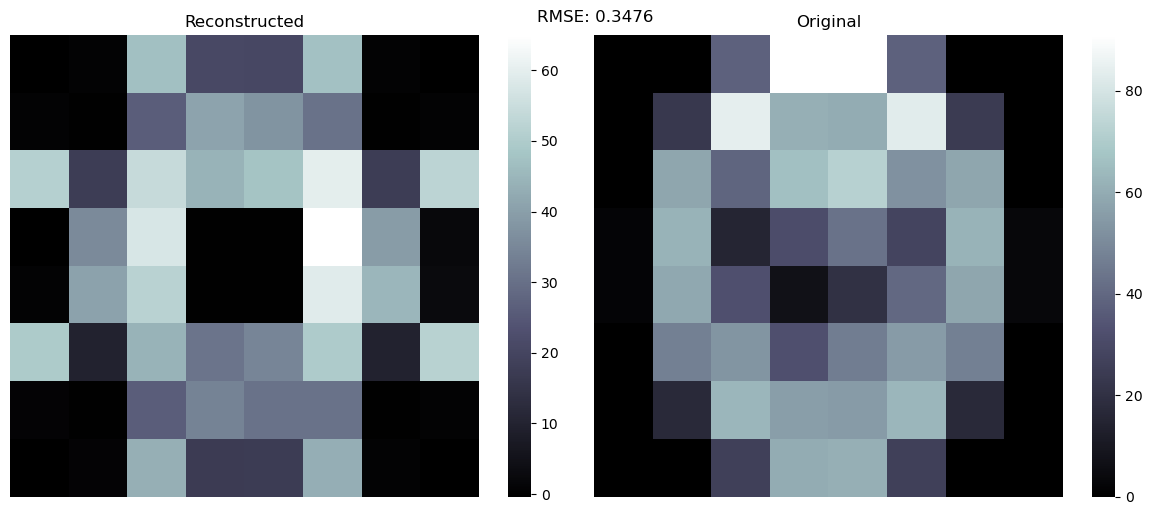

In [11]:
plot_images(x.reshape(new_res, -1), img, cmap='bone')

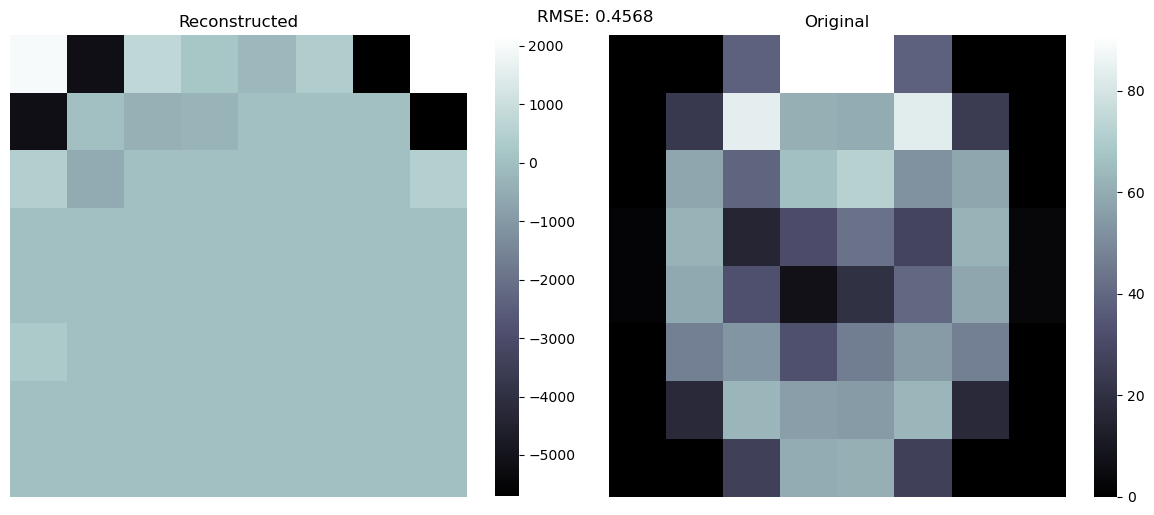

In [12]:
plot_images(x_try.reshape(new_res, -1), img, cmap='bone')